In [1]:
# -------------------------------------
# --- Go to correct starting folder ---
# -------------------------------------
# (when running jupyter lab in the browser, the notebook starts with CWD = folder where it is located, which breaks imports, ...)
import os
import pathlib

import torch

while not ((cwd := pathlib.Path(os.getcwd())) / "pyproject.toml").exists():
    os.chdir(cwd.parent)  # go 1 folder up

# Docs
This notebook checks if our optimization problem for finding optimally packed vectors works as expected and creates a few simple visualizations to illustrate this.

In [2]:
# --- other imports ---
import math

import matplotlib.pyplot as plt

from blog.post_0013.optimization import VectorOptimizer, max_abs_scaled_dot_product, scaled_dot_products
from blog.post_0013.visualization import show_vectors_2d
from shared.plotting import save_fig
from shared.plotting.colors import CLR_BLUE, CLR_GREEN, CLR_GREY, CLR_RED

In [3]:
# --- matplotlib ------------------------------------------
plt.rcParams["figure.dpi"] = 150

In [4]:
# --- initialize ------------------------------------------
class Results:
    def __init__(self):
        # map (n_dims, n_vectors, use_float64) -> (v_opt, n_steps, t_elapsed_sec)
        self._storage : dict[tuple[int, int, bool], tuple[torch.Tensor, int, float]] = dict()

    def register_result(self, optimizer: VectorOptimizer):
        """Register a result for the given dimensions and number of vectors."""
        self._storage[optimizer.n_dims, optimizer.n_vectors, optimizer.use_float64] = (optimizer.v, optimizer.n_steps, optimizer.t_elapsed)

    def show_results(self):
        """Print the results in a readable format."""
        for (n_dims, n_vectors, use_float64), (v_opt, n_steps, t_elapsed_sec) in self._storage.items():
            dtype = "float64" if use_float64 else "float32"
            print(f"n_dims: {n_dims:>4}, n_vectors: {n_vectors:>4} [{dtype}]  --->  "
                  f"maxabs dot product: {max_abs_scaled_dot_product(v_opt):.6e}, "
                  f"n_steps: {n_steps}, t_elapsed_sec: {t_elapsed_sec:.2f}")


results = Results()

Optimizing     2 vectors in     2 dimensions with alpha=20.0.
   Optimized for 100 steps.  lr: 1.000e-09 -> 1.000e+00,  loss: 1.671695262e-01 -> 6.846316159e-02.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.067418009e-01 -> 2.098883124e-05.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.317043618e-05 -> 1.440628949e-09.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.982112666e-10 -> 1.665334537e-14.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.048050535e-13 -> 5.062616992e-14.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.086420008e-14 -> 8.500911593e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 5.012e-01,  loss: 8.402541876e-01 -> 3.573011141e-03.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 1.562196878e-03 -> 1.986461626e-07.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 1.348909677e-07 -> 1.939781669e-12.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 1.875832822e-12 -> 8.881784197e-16.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 2.220446049e-16 -> 0.000000000e+00.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 9.259091020e-01 -> 6.344754100e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 8.325150609e-01 -> 8.537800908e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 5.012e-01,  loss: 7.402378321e-01 -> 6.018897295e-01.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 6.944283843e-01 -> 5.546864867e-01.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 5.345231891e-01 -> 5.553458333e-01.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 5.188187361e-01 -> 5.283601284e-01.
   Optimized for 100 steps.  lr: 5.012e-01 -> 2.512e-01,  loss: 5.321620703e-01 -> 4.999166727e-01.
   Optimized for 100 steps.  lr: 2.512e-01 -> 2.512e-01,  loss: 4.999153912e-01 -> 4.999092221e-01.
   Optimized for 100 steps.  lr: 2.512e-01 -> 2.512e-01,  loss: 4.999092221e-01 -> 4.999092519e-01.
   Optimized for 100 steps.  lr: 2.512e-01 -> 1.259e-01,  loss: 4.999092519e-01 -> 4.999092221e-01.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.230373383e+00 -> 8.170984387e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 8.517644405e-01 -> 9.169501066e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 5.012e-01,  loss: 8.793512583e-01 -> 7.172509432e-01.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 7.124646902e-01 -> 7.071045637e-01.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 7.071076035e-01 -> 7.092705965e-01.
   Optimized for 100 steps.  lr: 5.012e-01 -> 2.512e-01,  loss: 7.103814483e-01 -> 7.071037292e-01.
   Optimized for 100 steps.  lr: 2.512e-01 -> 2.512e-01,  loss: 7.071038485e-01 -> 7.071037292e-01.
   Optimized for 100 steps.  lr: 2.512e-01 -> 2.512e-01,  loss: 7.071037292e-01 -> 7.071037292e-01.
   Optimized for 100 steps.  lr: 2.512e-01 -> 2.512e-01,  loss: 7.071038485e-01 -> 7.071037889e-01.
   Optimized for 100 steps.  lr: 2.512e-01 -> 1.259e-01,  loss: 7.071037889e-01 -> 7.071037889e-01.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.896266937e+00 -> 8.184636831e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 8.263458610e-01 -> 8.159611225e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 5.012e-01,  loss: 8.114878535e-01 -> 8.089939952e-01.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 8.089939952e-01 -> 8.089939356e-01.
   Optimized for 100 steps.  lr: 5.012e-01 -> 2.512e-01,  loss: 8.089939356e-01 -> 8.089938760e-01.
   Optimized for 100 steps.  lr: 2.512e-01 -> 2.512e-01,  loss: 8.089939356e-01 -> 8.089939356e-01.
   Optimized for 100 steps.  lr: 2.512e-01 -> 1.259e-01,  loss: 8.089938164e-01 -> 8.089938164e-01.
   Optimized for 100 steps.  lr: 1.259e-01 -> 6.310e-02,  loss: 8.089939356e-01 -> 8.089938164e-01.
   Optimized for 100 steps.  lr: 6.310e-02 -> 3.162e-02,  loss: 8.089938760e-01 -> 8.089938760e-01.
   Optimized for 100 steps.  lr: 3.162e-02 -> 1.585e-02,  loss: 8.089938760e-01 -> 8.089938760e-01.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.708604813e+00 -> 8.659565449e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 8.660698533e-01 -> 8.659902215e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 8.658305407e-01 -> 8.818365335e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 5.012e-01,  loss: 8.701523542e-01 -> 8.657833934e-01.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 8.657832146e-01 -> 8.657830954e-01.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 8.657830954e-01 -> 8.657832146e-01.
   Optimized for 100 steps.  lr: 5.012e-01 -> 2.512e-01,  loss: 8.657831550e-01 -> 8.657831550e-01.
   Optimized for 100 steps.  lr: 2.512e-01 -> 1.259e-01,  loss: 8.657831550e-01 -> 8.657832146e-01.
   Optimized for 100 steps.  lr: 1.259e-01 -> 6.310e-02,  loss: 8.657832146e-01 -> 8.657832146e-01.
   Optimized for 100 steps.  lr: 6.310e-02 -> 3.162e-02,  loss: 8.657831550e-01 -> 8.657831550e-01.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.181921005e+00 -> 9.000185132e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 8.999894261e-01 -> 9.005414844e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 5.012e-01,  loss: 9.003221393e-01 -> 8.998931050e-01.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 8.998929858e-01 -> 8.998929262e-01.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 8.998930454e-01 -> 8.998930454e-01.
   Optimized for 100 steps.  lr: 5.012e-01 -> 2.512e-01,  loss: 8.998930454e-01 -> 8.998930454e-01.
   Optimized for 100 steps.  lr: 2.512e-01 -> 1.259e-01,  loss: 8.998930454e-01 -> 8.998928070e-01.
   Optimized for 100 steps.  lr: 1.259e-01 -> 1.259e-01,  loss: 8.998928070e-01 -> 8.998929262e-01.
   Optimized for 100 steps.  lr: 1.259e-01 -> 6.310e-02,  loss: 8.998928070e-01 -> 8.998929262e-01.
   Optimized for 100 steps.  lr: 6.310e-02 -> 3.162e-02,  loss: 8.998929262e-01 -> 8.998929262e-01.


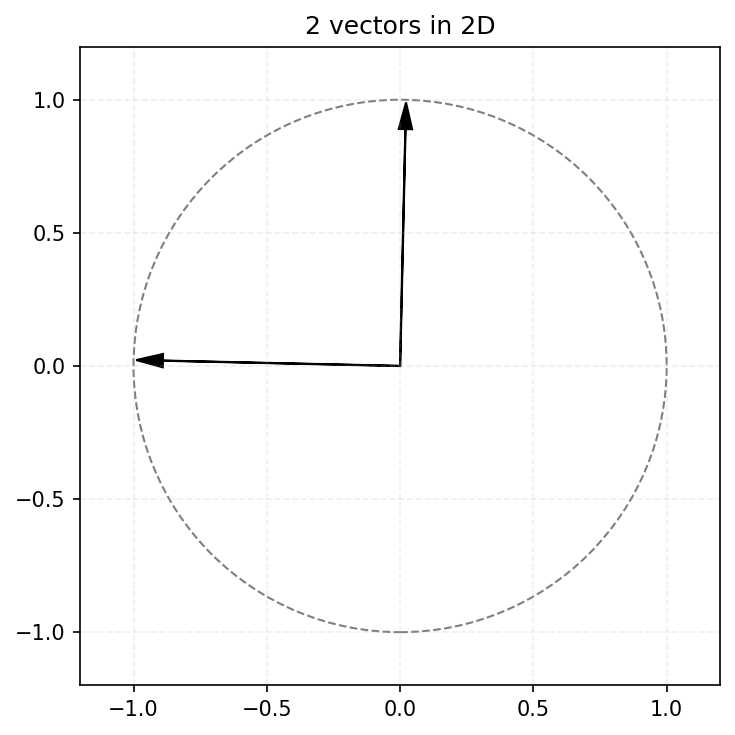

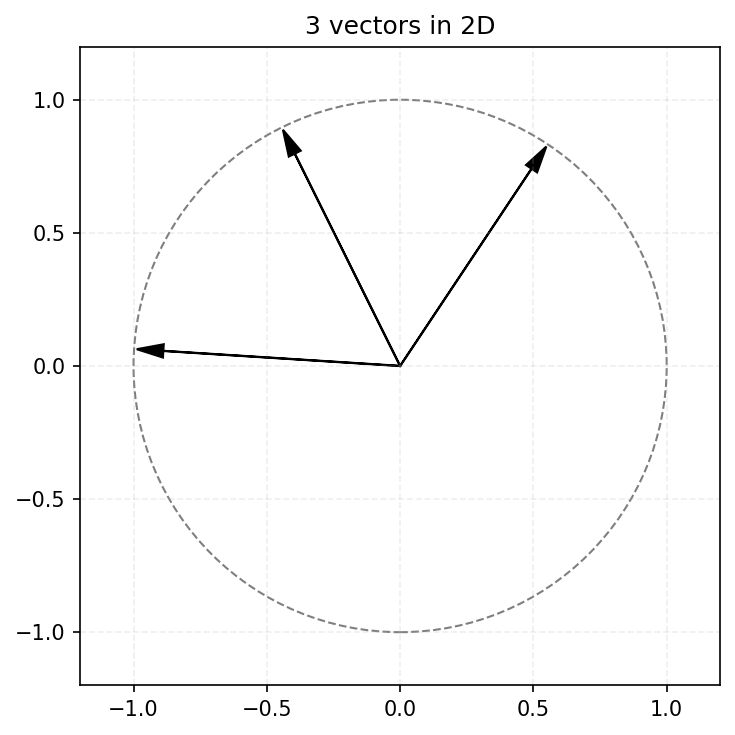

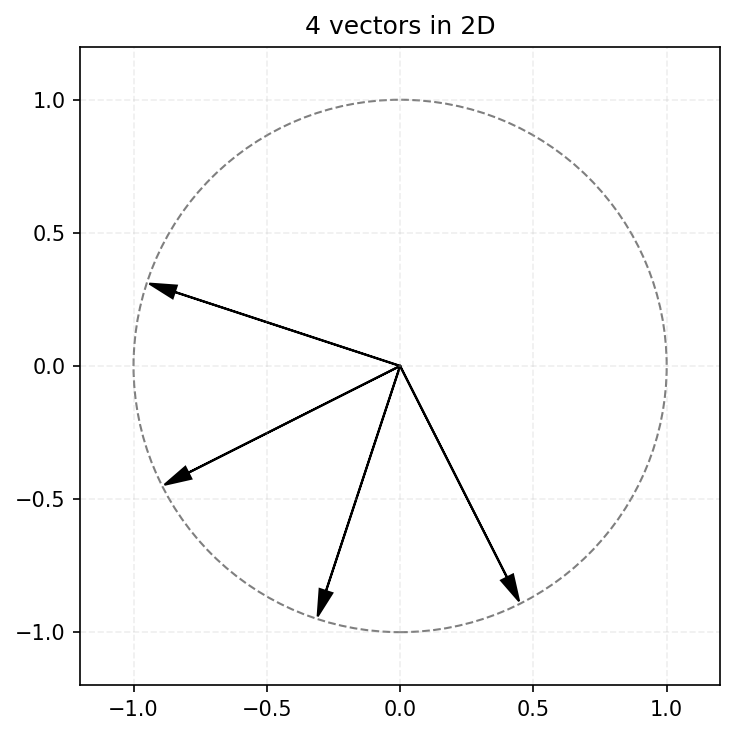

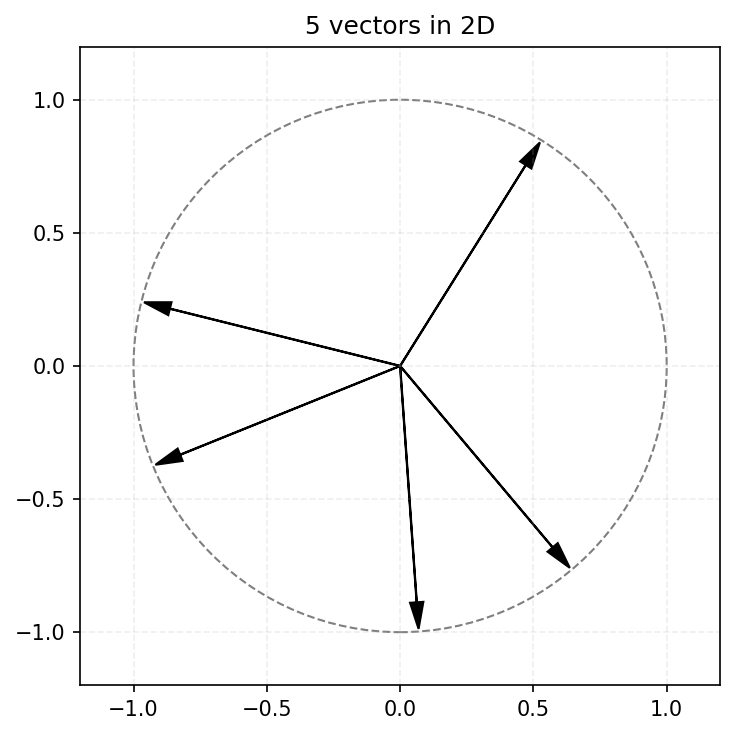

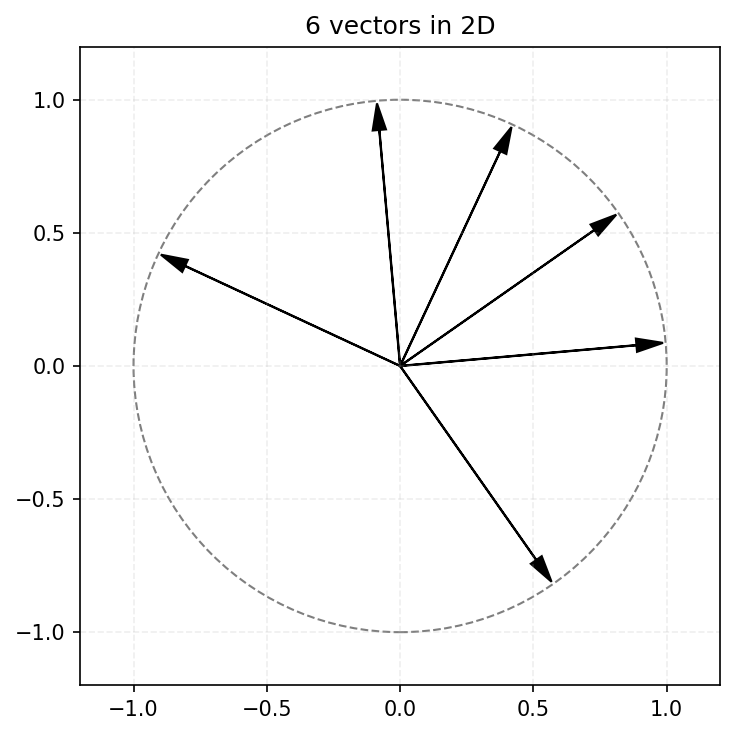

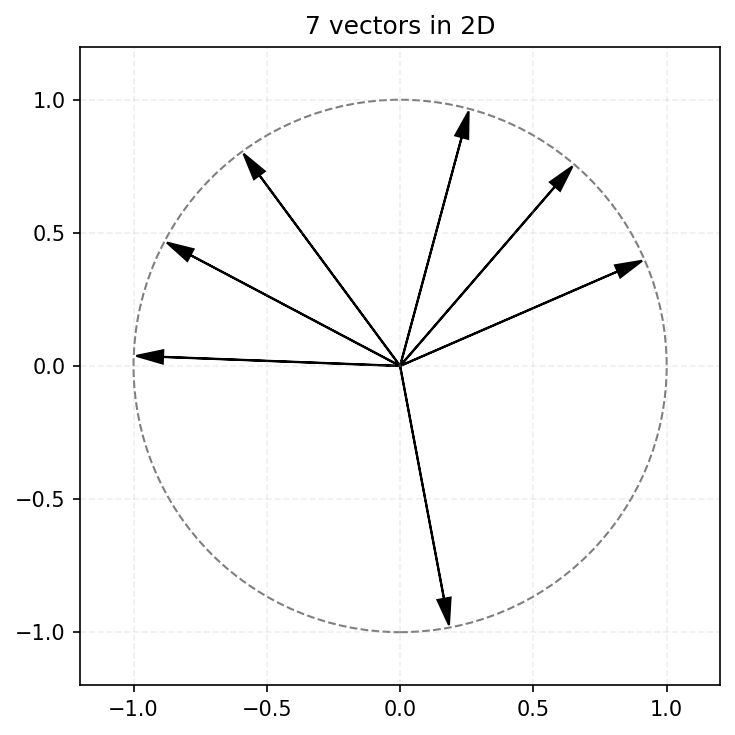

In [5]:
# --- initial test ----------------------------------------
n_dims = 2
for n_vectors in [2, 3, 4, 5, 6, 7]:
    # optimize near-orthogonal vectors
    optimizer = VectorOptimizer(n_dims=n_dims, n_vectors=n_vectors, alpha=20.0)
    optimizer.solve(verbose=True)

    results.register_result(optimizer)

    # visualize results
    fig, ax = show_vectors_2d(optimizer.v)

    # save
    save_fig(
        fig,
        post_nr=13,
        name=f"trial_2d_{n_vectors}_vectors",
    )

In [6]:
results.show_results()

n_dims:    2, n_vectors:    2 [float32]  --->  maxabs dot product: 0.000000e+00, n_steps: 4600, t_elapsed_sec: 7.03
n_dims:    2, n_vectors:    3 [float32]  --->  maxabs dot product: 5.000000e-01, n_steps: 3900, t_elapsed_sec: 5.45
n_dims:    2, n_vectors:    4 [float32]  --->  maxabs dot product: 7.071068e-01, n_steps: 3800, t_elapsed_sec: 5.52
n_dims:    2, n_vectors:    5 [float32]  --->  maxabs dot product: 8.090171e-01, n_steps: 3500, t_elapsed_sec: 4.97
n_dims:    2, n_vectors:    6 [float32]  --->  maxabs dot product: 8.660255e-01, n_steps: 3600, t_elapsed_sec: 5.07
n_dims:    2, n_vectors:    7 [float32]  --->  maxabs dot product: 9.009689e-01, n_steps: 3900, t_elapsed_sec: 5.56


In [7]:
# --- test scaling towards higher dimensions ---
# TEST 1 - n_dims = n_vectors
for use_float64 in [False, True]:

    for n in [5, 10, 20, 50, 75, 100, 150, 200]:
        n_dims = n
        n_vectors = n

        # optimize near-orthogonal vectors
        optimizer = VectorOptimizer(n_dims=n_dims, n_vectors=n_vectors, alpha=20.0, use_float64=use_float64)
        optimizer.solve(verbose=True)
        results.register_result(optimizer)


Optimizing     5 vectors in     5 dimensions with alpha=20.0.
   Optimized for 100 steps.  lr: 1.000e-09 -> 1.000e+00,  loss: 8.981346130e+00 -> 4.471426010e+00.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.663624287e+00 -> 2.993327379e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.674889743e-01 -> 6.502852440e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 5.012e-01,  loss: 6.913104653e-01 -> 1.261668652e-01.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 7.362484187e-02 -> 5.425943527e-06.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 5.079512448e-06 -> 2.520188502e-10.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 9.626788255e-11 -> 3.552713679e-14.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 4.374278717e-14 -> 1.010302952e-14.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 4.440892099e-14 -> 2.031708135e-14.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 1.021405183e-14 -> 2.264854970e-14.
   Optimized for 100 steps.  lr: 5.012e-01 -> 2.512e-01,  loss: 3.391731340e-14 -> 1.887379142e-15.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.962631798e+01 -> 6.238554716e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.007331371e+00 -> 5.625921488e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.901110411e-01 -> 6.884467602e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 5.012e-01,  loss: 5.311385393e-01 -> 2.675659955e-01.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 2.402668595e-01 -> 2.809146536e-04.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 2.254836436e-04 -> 7.978815830e-09.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 6.935348296e-09 -> 2.887134976e-13.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 2.007283229e-13 -> 6.702971511e-15.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 2.167710456e-14 -> 2.106648189e-14.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 5.075800891e-15 -> 4.073130722e-14.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.496029205e+02 -> 1.984796952e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.703084679e-03 -> 9.285275837e-08.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.407997771e-08 -> 2.456868042e-12.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.105260410e-12 -> 3.932982412e-13.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.512002329e-13 -> 1.770146529e-13.
   Optimized for 100 steps.  lr: 1.000e+00 -> 5.012e-01,  loss: 3.915704566e-14 -> 1.622400131e-14.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 5.701168704e-15 -> 1.659870158e-14.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 1.657615017e-14 -> 1.595511917e-14.
   Optimized for 100 steps.  lr: 5.012e-01 -> 2.512e-01,  loss: 1.106319897e-15 -> 6.739400704e-16.
   Optimized for 100 steps.  lr: 2.512e-01 -> 2.512e-01,  loss: 6.457508139e-16 -> 8.118505868e-16.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.208528076e+03 -> 3.441740200e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.242779151e-02 -> 4.459626041e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.421626683e-03 -> 1.474497491e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.305321231e-03 -> 3.360188927e-08.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.742908478e-08 -> 1.272620898e-12.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.072697486e-12 -> 2.833566715e-13.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.668248872e-13 -> 1.232902669e-13.
   Optimized for 100 steps.  lr: 1.000e+00 -> 5.012e-01,  loss: 1.948233241e-13 -> 4.383993168e-14.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 3.962108419e-14 -> 6.931955010e-15.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 3.202993426e-14 -> 2.161118506e-14.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.003602051e+03 -> 4.416368529e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.240560904e-02 -> 8.203353733e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.935686968e-03 -> 1.834374387e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.789745293e-03 -> 1.142805268e-04.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.045184472e-04 -> 1.171912118e-06.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.070125677e-06 -> 1.181992459e-08.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.075871481e-08 -> 9.258371847e-11.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 8.430944831e-11 -> 1.396083249e-11.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.623556845e-11 -> 8.576991604e-06.
   Optimized for 100 steps.  lr: 1.000e+00 -> 5.012e-01,  loss: 2.683273306e-05 -> 5.546556991e-09.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.510427246e+03 -> 4.609642550e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.464421049e-02 -> 1.570903510e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.541621238e-02 -> 6.004920695e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.889222492e-03 -> 2.222472336e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.176037990e-03 -> 6.211395958e-04.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.001961301e-04 -> 5.852308095e-05.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.532282375e-05 -> 3.263358167e-06.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.078097052e-06 -> 1.691324627e-07.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.592469800e-07 -> 7.771564725e-09.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.295732019e-09 -> 3.021738415e-10.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.294780469e+04 -> 4.621777311e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.499085248e-02 -> 2.113073319e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.088159695e-02 -> 1.207264327e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.194246113e-02 -> 7.019699086e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.943352986e-03 -> 4.022974055e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.977420274e-03 -> 2.235536929e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.208372112e-03 -> 1.182351494e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.167122158e-03 -> 6.665082183e-04.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.606169627e-04 -> 4.907787079e-04.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.888089024e-04 -> 3.968931851e-04.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.379887500e+04 -> 4.295603931e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.184760153e-02 -> 2.227402665e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.207404561e-02 -> 1.484632306e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.473522559e-02 -> 1.031907089e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.024573576e-02 -> 7.223398890e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.171689067e-03 -> 5.014760885e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.977584817e-03 -> 3.427007701e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.400338581e-03 -> 2.292884281e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.273965161e-03 -> 1.496771700e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.483699656e-03 -> 9.573170100e-04.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.091624620e+01 -> 6.403347419e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.416939068e-01 -> 5.346439832e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.149587636e-01 -> 5.825808937e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 5.012e-01,  loss: 5.848340751e-01 -> 1.369645160e-01.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 1.695925637e-01 -> 6.814644968e-02.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 8.482931368e-02 -> 2.467974223e-06.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 2.348351487e-06 -> 6.429103023e-11.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 6.738487246e-11 -> 2.248462102e-15.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 1.395287363e-15 -> 5.470406825e-20.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 3.401244122e-20 -> 1.758092391e-24.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.749963521e+01 -> 7.921350069e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.205297173e-01 -> 8.121136368e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 5.012e-01,  loss: 8.924414330e-01 -> 2.130200734e-01.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 1.968883260e-01 -> 6.294731447e-06.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 3.831811121e-06 -> 1.743185247e-10.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 1.138190969e-10 -> 4.243078310e-15.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 4.199487127e-15 -> 9.294113820e-20.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 1.178963349e-19 -> 3.456543866e-24.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 2.495694138e-24 -> 9.730722525e-29.
   Optimized for 100 steps.  lr: 5.012e-01 -> 5.012e-01,  loss: 7.295730778e-29 -> 1.214780312e-31.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.422055913e+02 -> 2.074502254e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.646270955e-03 -> 1.069348323e-07.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 8.988501924e-08 -> 2.321461890e-12.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.075863847e-12 -> 8.772500542e-17.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.648492435e-17 -> 2.331531676e-21.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.941396766e-21 -> 6.115837685e-26.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.511520169e-26 -> 3.023806309e-30.
   Optimized for 100 steps.  lr: 1.000e+00 -> 5.012e-01,  loss: 2.916628308e-30 -> 7.117815777e-32.
   Optimized for 100 steps.  lr: 5.012e-01 -> 2.512e-01,  loss: 9.337750965e-33 -> 3.593063052e-33.
   Optimized for 100 steps.  lr: 2.512e-01 -> 1.259e-01,  loss: 3.468178533e-33 -> 3.218409493e-33.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.170045578e+03 -> 3.343178512e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.151549394e-02 -> 3.867770537e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.782104445e-03 -> 2.547792722e-06.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.044528995e-06 -> 6.139746876e-11.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.897159900e-11 -> 1.547761153e-15.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.250735266e-15 -> 4.031460009e-20.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.264944974e-20 -> 1.167751612e-24.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 9.336740491e-25 -> 3.656878741e-29.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.331319543e-29 -> 2.915520898e-30.
   Optimized for 100 steps.  lr: 1.000e+00 -> 5.012e-01,  loss: 4.108189127e-30 -> 2.750649258e-31.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.940275187e+03 -> 4.597736558e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.424814351e-02 -> 1.043927190e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.016606688e-02 -> 2.845252516e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.762647248e-03 -> 1.821945134e-04.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.666621796e-04 -> 1.663494760e-06.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.516449370e-06 -> 1.635485612e-08.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.489425448e-08 -> 1.350323978e-10.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.223261872e-10 -> 8.148902204e-13.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.329262735e-13 -> 3.284634866e-15.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.927519241e-15 -> 7.889833847e-18.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.515104392e+03 -> 4.688602933e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.553032991e-02 -> 1.641924016e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.612586269e-02 -> 6.716309775e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.595052910e-03 -> 2.520240917e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.468361498e-03 -> 9.449378515e-04.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 9.259453123e-04 -> 1.591640249e-04.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.507352966e-04 -> 7.830335611e-06.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.362631087e-06 -> 3.617465178e-07.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.400274277e-07 -> 1.539511903e-08.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.443074285e-08 -> 5.524408592e-10.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.297031650e+04 -> 4.592882232e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.473121447e-02 -> 2.123164576e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.098551740e-02 -> 1.226924786e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.213999897e-02 -> 7.202201829e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.124294730e-03 -> 4.088498509e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.040235545e-03 -> 2.195671349e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.167377980e-03 -> 1.130425102e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.115501397e-03 -> 6.141737741e-04.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.076104841e-04 -> 3.526907517e-04.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.479098972e-04 -> 1.269725110e-04.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.383068534e+04 -> 4.294535954e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.193200867e-02 -> 2.240318378e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.220045606e-02 -> 1.486126691e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.474832759e-02 -> 1.025948493e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.018504310e-02 -> 7.126533587e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.074421417e-03 -> 4.910252986e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.873150023e-03 -> 3.335517425e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.309308991e-03 -> 2.234226686e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.216143318e-03 -> 1.483323786e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.471161184e-03 -> 9.849444091e-04.


In [8]:
results.show_results()

n_dims:    2, n_vectors:    2 [float32]  --->  maxabs dot product: 0.000000e+00, n_steps: 4600, t_elapsed_sec: 7.03
n_dims:    2, n_vectors:    3 [float32]  --->  maxabs dot product: 5.000000e-01, n_steps: 3900, t_elapsed_sec: 5.45
n_dims:    2, n_vectors:    4 [float32]  --->  maxabs dot product: 7.071068e-01, n_steps: 3800, t_elapsed_sec: 5.52
n_dims:    2, n_vectors:    5 [float32]  --->  maxabs dot product: 8.090171e-01, n_steps: 3500, t_elapsed_sec: 4.97
n_dims:    2, n_vectors:    6 [float32]  --->  maxabs dot product: 8.660255e-01, n_steps: 3600, t_elapsed_sec: 5.07
n_dims:    2, n_vectors:    7 [float32]  --->  maxabs dot product: 9.009689e-01, n_steps: 3900, t_elapsed_sec: 5.56
n_dims:    5, n_vectors:    5 [float32]  --->  maxabs dot product: 0.000000e+00, n_steps: 4200, t_elapsed_sec: 5.87
n_dims:   10, n_vectors:   10 [float32]  --->  maxabs dot product: 2.135743e-08, n_steps: 4800, t_elapsed_sec: 7.11
n_dims:   20, n_vectors:   20 [float32]  --->  maxabs dot product: 2.434

In [9]:
# --- test scaling towards higher dimensions ---
# TEST 2 - n_dims < n_vectors
n_dims = 100
for use_float64 in [False, True]:
    for n_vectors in [105, 110, 120, 150, 200, 250, 300, 400, 500]:

        # optimize near-orthogonal vectors
        optimizer = VectorOptimizer(n_dims=n_dims, n_vectors=n_vectors, alpha=20.0, use_float64=use_float64)
        optimizer.solve(verbose=True)
        results.register_result(optimizer)


Optimizing   105 vectors in   100 dimensions with alpha=20.0.
   Optimized for 100 steps.  lr: 1.000e-09 -> 1.000e+00,  loss: 8.636797852e+03 -> 4.219959473e+03.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.737796387e+03 -> 5.113035440e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.965201393e-02 -> 1.920530200e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.889896020e-02 -> 9.272066876e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 9.157801978e-03 -> 5.836074241e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.802348722e-03 -> 5.010160618e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.004800856e-03 -> 4.889535252e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.888641182e-03 -> 4.862240050e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.861899652e-03 -> 4.849270917e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.849076271e-03 -> 4.841592629e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.841476213e-03 -> 4.837034270e-03.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.102863281e+03 -> 5.408183113e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.261453241e-02 -> 2.355358377e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.326030657e-02 -> 1.382747106e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.371037774e-02 -> 1.029902790e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.026655920e-02 -> 9.527646005e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 9.522419423e-03 -> 9.397719055e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 9.396547452e-03 -> 9.357620962e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 9.357039817e-03 -> 9.332756512e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 9.332318790e-03 -> 9.312643670e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 9.312273934e-03 -> 9.295292199e-03.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.372665039e+03 -> 5.985866860e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.839627981e-02 -> 2.952858992e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.924768254e-02 -> 2.060478739e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.050836012e-02 -> 1.794079132e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.791765541e-02 -> 1.731087081e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.730453596e-02 -> 1.708846539e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.708520763e-02 -> 1.695075072e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.694839261e-02 -> 1.684580557e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.684394106e-02 -> 1.676163822e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.676012762e-02 -> 1.669289730e-02.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 8.323266602e+03 -> 7.222391665e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.079252601e-02 -> 4.461712763e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.438545555e-02 -> 3.739180416e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.730990365e-02 -> 3.476687148e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.473550826e-02 -> 3.366649896e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.365125135e-02 -> 3.306969255e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.306033462e-02 -> 3.267440572e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.266772255e-02 -> 3.238101676e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.237590194e-02 -> 3.215412423e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.215013072e-02 -> 3.197544441e-02.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.096412500e+04 -> 8.728703111e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 8.595739305e-02 -> 6.087367609e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.065884605e-02 -> 5.398520455e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.389990658e-02 -> 5.093208700e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.088939145e-02 -> 4.928811640e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.926308617e-02 -> 4.826907068e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.825258628e-02 -> 4.756995663e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.755814001e-02 -> 4.705416411e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.704520851e-02 -> 4.665654898e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.664953053e-02 -> 4.634201154e-02.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.350975293e+04 -> 9.869255871e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 9.725262970e-02 -> 7.226137817e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.203686237e-02 -> 6.479918212e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.470270455e-02 -> 6.123958156e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.118779257e-02 -> 5.918544903e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.915314704e-02 -> 5.784310400e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.782095715e-02 -> 5.689534172e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.687922239e-02 -> 5.619165301e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.617942289e-02 -> 5.564928427e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.563970283e-02 -> 5.521924049e-02.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.662131641e+04 -> 1.066255867e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.053312197e-01 -> 8.026538789e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 8.003537357e-02 -> 7.253232598e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.242991775e-02 -> 6.867351383e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.861612201e-02 -> 6.636674702e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.632983685e-02 -> 6.480922550e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.478302926e-02 -> 6.367021799e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.365051866e-02 -> 6.279931217e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.278400868e-02 -> 6.211367995e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.210144237e-02 -> 6.155738235e-02.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.175990430e+04 -> 1.183179915e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.170323491e-01 -> 9.234666824e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 9.211076051e-02 -> 8.417089283e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 8.405820280e-02 -> 7.978621870e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.971829921e-02 -> 7.697833329e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.693217695e-02 -> 7.500293106e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.496928424e-02 -> 7.352883369e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.350312918e-02 -> 7.238283753e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.236251235e-02 -> 7.146480680e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.144829631e-02 -> 7.071223855e-02.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.695660156e+04 -> 1.279487759e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.266405135e-01 -> 1.014064923e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.011573225e-01 -> 9.262453765e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 9.250120819e-02 -> 8.778201044e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 8.770633489e-02 -> 8.463422954e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 8.458208293e-02 -> 8.238925785e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 8.235073090e-02 -> 8.068837225e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 8.065843582e-02 -> 7.934296131e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.931885123e-02 -> 7.824727893e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.822743058e-02 -> 7.733658701e-02.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.637396626e+03 -> 4.928004097e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.785223981e-02 -> 1.852637986e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.823355002e-02 -> 8.835481126e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 8.720376549e-03 -> 5.548340326e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.521940637e-03 -> 4.967211920e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.963690623e-03 -> 4.882424951e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.881693192e-03 -> 4.858531111e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.858216053e-03 -> 4.846585394e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.846409212e-03 -> 4.839832423e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.839733399e-03 -> 4.836090605e-03.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.976490866e+03 -> 5.293208081e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.144257703e-02 -> 2.258445842e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.230328360e-02 -> 1.334689685e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.324011542e-02 -> 1.022434386e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.019564069e-02 -> 9.524024972e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 9.519028574e-03 -> 9.395279313e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 9.394047452e-03 -> 9.352693407e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 9.352082035e-03 -> 9.327060664e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 9.326622748e-03 -> 9.307351399e-03.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 9.306995514e-03 -> 9.290994473e-03.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.435628685e+03 -> 5.788086775e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.647370084e-02 -> 2.936553085e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.910729698e-02 -> 2.095587803e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.085779170e-02 -> 1.807069132e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.804377261e-02 -> 1.734038308e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.733328312e-02 -> 1.709886293e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.709543428e-02 -> 1.695543126e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.695299926e-02 -> 1.684797364e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.684608239e-02 -> 1.676330524e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.676179766e-02 -> 1.669519538e-02.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 8.106160994e+03 -> 7.190709624e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.048642386e-02 -> 4.453639481e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.430730961e-02 -> 3.737942976e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.729781768e-02 -> 3.473792507e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.470609731e-02 -> 3.362301261e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.360757654e-02 -> 3.301719189e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.300767394e-02 -> 3.261814400e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.261147185e-02 -> 3.232893123e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.232394549e-02 -> 3.210891185e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 3.210504569e-02 -> 3.193567422e-02.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.115988735e+04 -> 8.636014424e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 8.493252294e-02 -> 6.050024240e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.029088182e-02 -> 5.378389815e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.370180640e-02 -> 5.085919617e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.081819202e-02 -> 4.926219793e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.923749865e-02 -> 4.824518093e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.822856092e-02 -> 4.753993291e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.752807023e-02 -> 4.702681985e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.701799766e-02 -> 4.663765167e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 4.663080989e-02 -> 4.633015919e-02.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.393436930e+04 -> 9.849388867e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 9.699161231e-02 -> 7.167887195e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.145914221e-02 -> 6.449704671e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.440550096e-02 -> 6.112775651e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.107870666e-02 -> 5.916813845e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.913696784e-02 -> 5.786112947e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.783935902e-02 -> 5.692389819e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.690786534e-02 -> 5.621992766e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.620761776e-02 -> 5.566938295e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 5.565956391e-02 -> 5.522394485e-02.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.627253014e+04 -> 1.059656191e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.046674226e-01 -> 8.009853980e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.987388735e-02 -> 7.249728979e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.239604311e-02 -> 6.867908587e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.862217132e-02 -> 6.638406254e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.634724733e-02 -> 6.483102668e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.480495781e-02 -> 6.369901566e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.367943506e-02 -> 6.283022919e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.281486751e-02 -> 6.213858681e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 6.212618793e-02 -> 6.157566528e-02.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.204715123e+04 -> 1.191390125e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.177971458e-01 -> 9.251390085e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 9.227286367e-02 -> 8.416539382e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 8.405100457e-02 -> 7.976157451e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.969423278e-02 -> 7.699632149e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.695108443e-02 -> 7.505975771e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.502669920e-02 -> 7.360421284e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.357866611e-02 -> 7.245978711e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.243937418e-02 -> 7.153623298e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.151960265e-02 -> 7.077855998e-02.


  0%|          | 0/31 [00:00<?, ?it/s]

   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 2.760424555e+04 -> 1.264123328e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.252048989e-01 -> 1.009596013e-01.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 1.007185159e-01 -> 9.239101558e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 9.226944304e-02 -> 8.760437712e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 8.752962892e-02 -> 8.451033470e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 8.445938010e-02 -> 8.232051803e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 8.228297961e-02 -> 8.066198566e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 8.063275492e-02 -> 7.934605896e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.932243180e-02 -> 7.826845764e-02.
   Optimized for 100 steps.  lr: 1.000e+00 -> 1.000e+00,  loss: 7.824885794e-02 -> 7.736613014e-02.


In [10]:
results.show_results()

n_dims:    2, n_vectors:    2 [float32]  --->  maxabs dot product: 0.000000e+00, n_steps: 4600, t_elapsed_sec: 7.03
n_dims:    2, n_vectors:    3 [float32]  --->  maxabs dot product: 5.000000e-01, n_steps: 3900, t_elapsed_sec: 5.45
n_dims:    2, n_vectors:    4 [float32]  --->  maxabs dot product: 7.071068e-01, n_steps: 3800, t_elapsed_sec: 5.52
n_dims:    2, n_vectors:    5 [float32]  --->  maxabs dot product: 8.090171e-01, n_steps: 3500, t_elapsed_sec: 4.97
n_dims:    2, n_vectors:    6 [float32]  --->  maxabs dot product: 8.660255e-01, n_steps: 3600, t_elapsed_sec: 5.07
n_dims:    2, n_vectors:    7 [float32]  --->  maxabs dot product: 9.009689e-01, n_steps: 3900, t_elapsed_sec: 5.56
n_dims:    5, n_vectors:    5 [float32]  --->  maxabs dot product: 0.000000e+00, n_steps: 4200, t_elapsed_sec: 5.87
n_dims:   10, n_vectors:   10 [float32]  --->  maxabs dot product: 2.135743e-08, n_steps: 4800, t_elapsed_sec: 7.11
n_dims:   20, n_vectors:   20 [float32]  --->  maxabs dot product: 2.434

In [11]:
# n_dims:    2, n_vectors:    2, max abs scaled dot product: 3.027981e-18
# n_dims:    2, n_vectors:    3, max abs scaled dot product: 5.000000e-01
# n_dims:    2, n_vectors:    4, max abs scaled dot product: 7.071068e-01
# n_dims:    2, n_vectors:    5, max abs scaled dot product: 8.090170e-01
# n_dims:    2, n_vectors:    6, max abs scaled dot product: 8.660254e-01
# n_dims:    2, n_vectors:    7, max abs scaled dot product: 9.009689e-01
# n_dims:    5, n_vectors:    5, max abs scaled dot product: 2.775558e-17
# n_dims:   10, n_vectors:   10, max abs scaled dot product: 5.754022e-17
# n_dims:   20, n_vectors:   20, max abs scaled dot product: 4.779039e-17
# n_dims:   50, n_vectors:   50, max abs scaled dot product: 2.016413e-16
# n_dims:   75, n_vectors:   75, max abs scaled dot product: 1.087645e-14
# n_dims:  100, n_vectors:  100, max abs scaled dot product: 8.409974e-14
# n_dims:  150, n_vectors:  150, max abs scaled dot product: 5.097163e-12
# n_dims:  200, n_vectors:  200, max abs scaled dot product: 4.850971e-09

# n_dims:  100, n_vectors:  105, max abs scaled dot product: 4.439157e-02
# n_dims:  100, n_vectors:  110, max abs scaled dot product: 6.934194e-02
# n_dims:  100, n_vectors:  120, max abs scaled dot product: 6.472932e-02
# n_dims:  100, n_vectors:  150, max abs scaled dot product: 8.014925e-02
# n_dims:  100, n_vectors:  200, max abs scaled dot product: 9.773361e-02
# n_dims:  100, n_vectors:  250, max abs scaled dot product: 1.068799e-01
# n_dims:  100, n_vectors:  300, max abs scaled dot product: 1.183302e-01
# n_dims:  100, n_vectors:  400, max abs scaled dot product: 1.317791e-01
# n_dims:  100, n_vectors:  500, max abs scaled dot product: 1.418358e-01